In [52]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.integrate import odeint  
import math
import random

lacI_col = '#bd2229'
cI_col = '#015486'
tetR_col = '#ef893c'
GFP_col = '#339d58'
colors = ['#c1272d', '#0000a7', '#eecc16', '#008176', '#b3b3b3']

Task 1

In [53]:
# model of repression p_lacI --| p_tetR
# at constant p_lacI levels

def sdot_repression(s,t,params):  
    
    km, km0, kdm, kp, kdp, K, n, p_lacI = params 
    m_tetR, p_tetR = s
    
    rate_m_tetR_prod = km * K**n/(K**n + p_lacI**n) + km0
    rate_p_tetR_prod = kp * m_tetR

    rate_m_tetR_loss = kdm * m_tetR
    rate_p_tetR_loss = kdp * p_tetR

    dm_tetR = rate_m_tetR_prod - rate_m_tetR_loss
    dp_tetR = rate_p_tetR_prod - rate_p_tetR_loss

    
    ds = [ dm_tetR, dp_tetR ]
    
    return ds  

In [54]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40
n = 2

# initial conditions
m_tetR0 = 0
p_tetR0 = 0

s0 = [m_tetR0, p_tetR0]

# time observations
t_max = 1000
t_obs = np.linspace(0,t_max,t_max+1) 


# values to loop over
max_value = 200
p_lacI_vals = np.linspace(0,max_value,101) # [p lacI]

# create array to store results
p_tetR_vals = []

for p_lacI  in p_lacI_vals:
    # set up parameters
    params = [km, km0, kdm, kp, kdp, K, n, p_lacI]

    # run simulation
    s_obs = odeint(sdot_repression,s0,t_obs,args=(params,))  
    m_tetR_obs = s_obs[:,0]
    p_tetR_obs = s_obs[:,1]

    # extract and store final protein level
    p_tetR_vals.append(p_tetR_obs[-1]) # [p tetR] at steady state

(0.0, 9000.0)

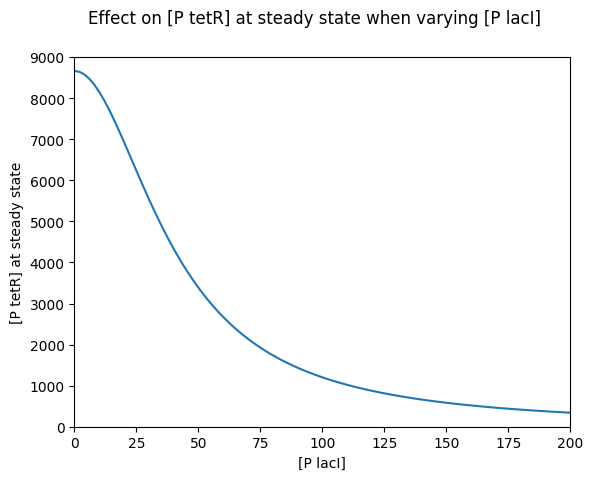

In [55]:
fig1 = plt.figure()
fig1.suptitle('Effect on [P tetR] at steady state when varying [P lacI]')
ax = fig1.add_subplot()
ax.set_xlabel('[P lacI]')
ax.set_ylabel('[P tetR] at steady state')
ax.plot(p_lacI_vals, p_tetR_vals, '-')
ax.set_xlim(0,max_value)
ax.set_ylim(0,9000)

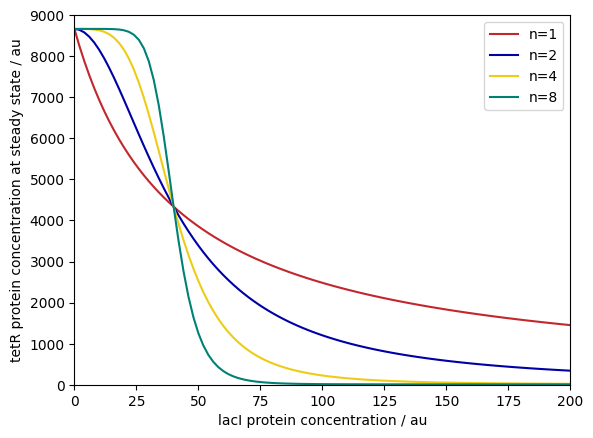

In [56]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40

# initial conditions
m_tetR0 = 0
p_tetR0 = 0

s0 = [m_tetR0, p_tetR0]

# time observations
t_max = 1000
t_obs = np.linspace(0,t_max,t_max+1) 

# values to loop over
max_value = 200
p_lacI_vals = np.linspace(0,max_value,101) # [p lacI]

fig2 = plt.figure()
# fig2.suptitle('Effect on [P tetR] at steady state when varying [P lacI]')
ax = fig2.add_subplot()
ax.set_xlabel('lacI protein concentration / au')
ax.set_ylabel('tetR protein concentration at steady state / au')
ax.set_xlim(0,max_value)
ax.set_ylim(0,9000)

n_vals = [1,2,4,8]
for n,col in zip(n_vals,colors):
    # create array to store results
    p_tetR_vals = []
    for p_lacI  in p_lacI_vals:
        # set up parameters
        params = [km, km0, kdm, kp, kdp, K, n, p_lacI]

        # run simulation
        s_obs = odeint(sdot_repression,s0,t_obs,args=(params,))  
        m_tetR_obs = s_obs[:,0]
        p_tetR_obs = s_obs[:,1]

        # extract and store final protein level
        p_tetR_vals.append(p_tetR_obs[-1]) # [p tetR] at steady state

    ax.plot(p_lacI_vals, p_tetR_vals, '-', label=f'n={n}', color=col)

ax.legend()

Task 2

In [57]:
def sdot_repressilator(s,t,params):  
    
    km, km0, kdm, kp, kdp, K, n = params 
    m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI = s
        
    rate_m_tetR_prod = km * K**n/(K**n + p_lacI**n) + km0
    rate_m_lacI_prod = km * K**n/(K**n + p_cI**n) + km0
    rate_m_cI_prod   = km * K**n/(K**n + p_tetR**n) + km0
    
    rate_p_tetR_prod = kp * m_tetR
    rate_p_lacI_prod = kp * m_lacI
    rate_p_cI_prod   = kp * m_cI
    
    rate_m_tetR_loss = kdm * m_tetR
    rate_m_lacI_loss = kdm * m_lacI
    rate_m_cI_loss   = kdm * m_cI
    
    rate_p_tetR_loss = kdp * p_tetR
    rate_p_lacI_loss = kdp * p_lacI
    rate_p_cI_loss   = kdp * p_cI
    
    dm_tetR = rate_m_tetR_prod - rate_m_tetR_loss
    dm_lacI = rate_m_lacI_prod - rate_m_lacI_loss
    dm_cI   = rate_m_cI_prod - rate_m_cI_loss
    
    dp_tetR = rate_p_tetR_prod - rate_p_tetR_loss
    dp_lacI = rate_p_lacI_prod - rate_p_lacI_loss
    dp_cI   = rate_p_cI_prod - rate_p_cI_loss
    
    ds = [dm_tetR, dm_lacI, dm_cI, dp_tetR, dp_lacI, dp_cI]
    
    return ds  

In [58]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40
n = 2

params = [ km, km0, kdm, kp, kdp, K, n ]


#intitial condtions
m_tetR0 = 5
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 0
p_lacI0 = 0
p_cI0   = 0

s0 = [ m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0 ]


# set time observations

t_max = 1000
t_obs = np.linspace(0,t_max,t_max+1) 

In [59]:
# run simulation

s_obs_1 = odeint(sdot_repressilator,s0,t_obs,args=(params,))  

m_tetR_obs = s_obs_1[:,0]
m_lacI_obs = s_obs_1[:,1]
m_cI_obs = s_obs_1[:,2]

p_tetR_obs = s_obs_1[:,3]
p_lacI_obs = s_obs_1[:,4]
p_cI_obs =   s_obs_1[:,5]



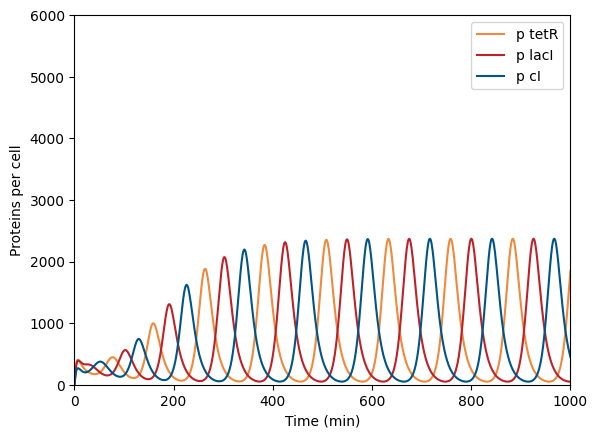

In [60]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylabel('Proteins per cell')
ax.set_xlabel('Time (min)')
ax.set_ylim(0,6000)
ax.set_xlim(0,1000)

ax.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
ax.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
ax.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)

ax.legend(loc='best')

Text(0.5, 0, 'Time / min')

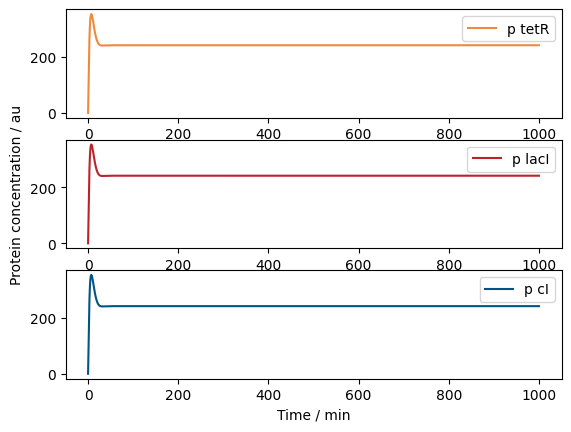

In [61]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40
n = 2

params = [ km, km0, kdm, kp, kdp, K, n ]


#intitial condtions
m_tetR0 = 5
m_lacI0 = 5
m_cI0   = 5

p_tetR0 = 0
p_lacI0 = 0
p_cI0   = 0

s0 = [ m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0 ]

# set time observations

t_max = 1000
t_obs = np.linspace(0,t_max,t_max+1) 

# run simulation

s_obs_2 = odeint(sdot_repressilator,s0,t_obs,args=(params,))

m_tetR_obs = s_obs_2[:,0]
m_lacI_obs = s_obs_2[:,1]
m_cI_obs =   s_obs_2[:,2]

p_tetR_obs = s_obs_2[:,3]
p_lacI_obs = s_obs_2[:,4]
p_cI_obs =   s_obs_2[:,5]

p_cI_obs_ss = p_cI_obs[-1]
p_lacI_obs_ss = p_lacI_obs[-1]


fig = plt.figure()

ax1 = fig.add_subplot(3,1,1)
ax1.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
ax1.legend(loc='best')

ax2 = fig.add_subplot(3,1,2)
ax2.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
ax2.legend(loc='best')
ax2.set_ylabel('Protein concentration / au')

ax3 = ax2 = fig.add_subplot(3,1,3)
ax3.plot(t_obs, p_cI_obs, '-', label='p cI', color=cI_col)
ax3.legend(loc='best')
ax3.set_xlabel('Time / min')

In [62]:
print (f'protein steady state: {p_tetR_obs[-1]}')
print (f'mRNA steady state: {m_tetR_obs[-1]}')

protein steady state: 240.8966510857065
mRNA steady state: 2.408966510857031


In [63]:
p_ss = p_tetR_obs[-1]
m_ss = m_tetR_obs[-1]

In [64]:
# back to original results

p_tetR_obs = s_obs_1[:,3]
p_lacI_obs = s_obs_1[:,4]
p_cI_obs =   s_obs_1[:,5]

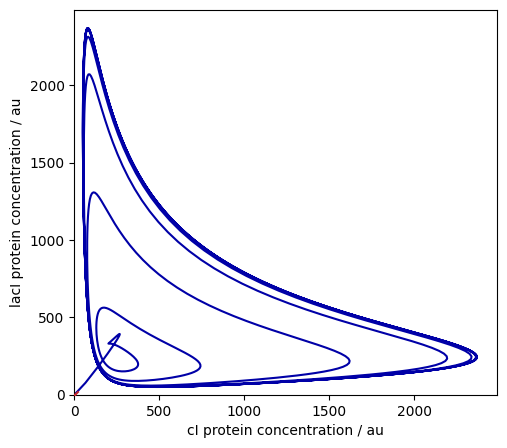

In [65]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(p_cI_obs, p_lacI_obs,color=colors[1])
ax1.set_xlabel('cI protein concentration / au')
ax1.set_ylabel('lacI protein concentration / au')
ax1.set_ylim(0,None)
ax1.set_xlim(0,None)
ax1.scatter(p_cI_obs[0],p_lacI_obs[0],marker='x', color=colors[0],zorder=3)

In [66]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40
n = 2

params = [ km, km0, kdm, kp, kdp, K, n ]


#intitial condtions
m_tetR0 = m_ss * 0.99
m_lacI0 = m_ss
m_cI0   = m_ss

p_tetR0 = p_ss
p_lacI0 = p_ss
p_cI0   = p_ss

s0 = [ m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0 ]


# set time observations

t_max = 1000
t_obs = np.linspace(0,t_max,t_max+1) 

# run simulation

s_obs_1 = odeint(sdot_repressilator,s0,t_obs,args=(params,))  

m_tetR_obs = s_obs_1[:,0]
m_lacI_obs = s_obs_1[:,1]
m_cI_obs = s_obs_1[:,2]

p_tetR_obs = s_obs_1[:,3]
p_lacI_obs = s_obs_1[:,4]
p_cI_obs =   s_obs_1[:,5]


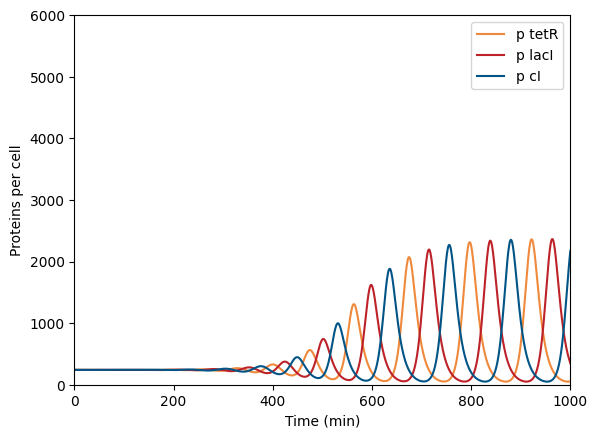

In [67]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylabel('Proteins per cell')
ax.set_xlabel('Time (min)')
ax.set_ylim(0,6000)
ax.set_xlim(0,1000)

ax.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
ax.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
ax.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)

ax.legend(loc='best')

(0.0, 2468.0253039119225)

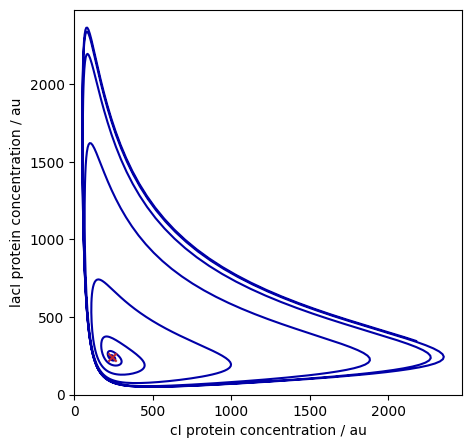

In [68]:
fig = plt.figure(figsize=(5,5))

ax1 = fig.add_subplot(111)
ax1.plot(p_cI_obs, p_lacI_obs,color=colors[1])
ax1.scatter(p_ss,p_ss,marker='x', color=colors[0],zorder=3)
ax1.set_xlabel('cI protein concentration / au')
ax1.set_ylabel('lacI protein concentration / au')
ax1.set_ylim(0,None)
ax1.set_xlim(0,None)

Task 3

In [69]:
def sdot_repressilator(s,t,params):  
    
    km, km0, kdm, kp, kdp, K, n = params 
    m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI = s
        
    rate_m_tetR_prod = km * K**n/(K**n + p_lacI**n) + km0
    rate_m_lacI_prod = km * K**n/(K**n + p_cI**n) + km0
    rate_m_cI_prod   = km * K**n/(K**n + p_tetR**n) + km0
    
    rate_p_tetR_prod = kp * m_tetR
    rate_p_lacI_prod = kp * m_lacI
    rate_p_cI_prod   = kp * m_cI
    
    rate_m_tetR_loss = kdm * m_tetR
    rate_m_lacI_loss = kdm * m_lacI
    rate_m_cI_loss   = kdm * m_cI
    
    rate_p_tetR_loss = kdp * p_tetR
    rate_p_lacI_loss = kdp * p_lacI
    rate_p_cI_loss   = kdp * p_cI
    
    dm_tetR = rate_m_tetR_prod - rate_m_tetR_loss
    dm_lacI = rate_m_lacI_prod - rate_m_lacI_loss
    dm_cI   = rate_m_cI_prod - rate_m_cI_loss
    
    dp_tetR = rate_p_tetR_prod - rate_p_tetR_loss
    dp_lacI = rate_p_lacI_prod - rate_p_lacI_loss
    dp_cI   = rate_p_cI_prod - rate_p_cI_loss
    
    ds = [dm_tetR, dm_lacI, dm_cI, dp_tetR, dp_lacI, dp_cI]
    
    return ds  

In [70]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40

#initial condtions
m_tetR0 = 5
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 0
p_lacI0 = 0
p_cI0   = 0

s0 = [ m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0 ]

# set time observations

t_max = 10000
t_obs = np.linspace(0,t_max,t_max+1)

s_runs = []

n_vals = np.linspace(1,4,121)
print (n_vals)
# run simulation
for n in n_vals:
    params = [ km, km0, kdm, kp, kdp, K, n ]
    s_obs = odeint(sdot_repressilator,s0,t_obs,args=(params,))

    s_runs.append(s_obs)


[1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175 1.2   1.225 1.25  1.275
 1.3   1.325 1.35  1.375 1.4   1.425 1.45  1.475 1.5   1.525 1.55  1.575
 1.6   1.625 1.65  1.675 1.7   1.725 1.75  1.775 1.8   1.825 1.85  1.875
 1.9   1.925 1.95  1.975 2.    2.025 2.05  2.075 2.1   2.125 2.15  2.175
 2.2   2.225 2.25  2.275 2.3   2.325 2.35  2.375 2.4   2.425 2.45  2.475
 2.5   2.525 2.55  2.575 2.6   2.625 2.65  2.675 2.7   2.725 2.75  2.775
 2.8   2.825 2.85  2.875 2.9   2.925 2.95  2.975 3.    3.025 3.05  3.075
 3.1   3.125 3.15  3.175 3.2   3.225 3.25  3.275 3.3   3.325 3.35  3.375
 3.4   3.425 3.45  3.475 3.5   3.525 3.55  3.575 3.6   3.625 3.65  3.675
 3.7   3.725 3.75  3.775 3.8   3.825 3.85  3.875 3.9   3.925 3.95  3.975
 4.   ]


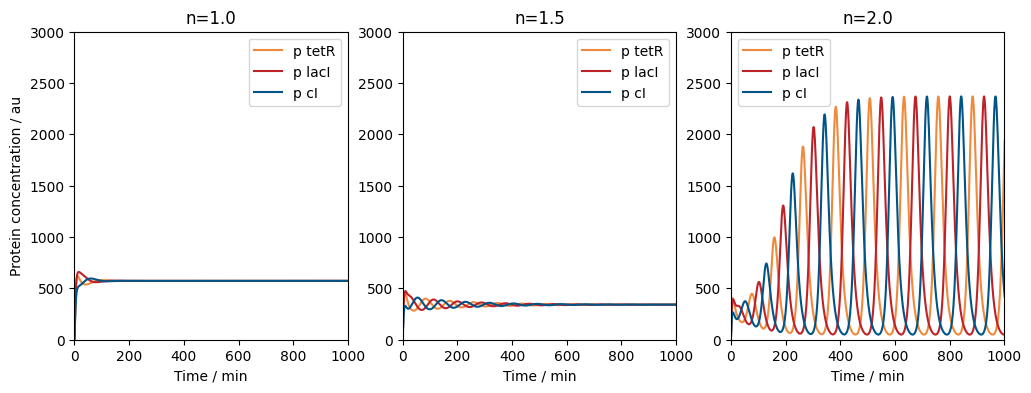

In [71]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.set_ylabel('Protein concentration / au')
ax1.set_xlabel('Time / min')
ax1.set_ylim(0,3000)
ax1.set_xlim(0,1000)
ax1.set_title('n=1.0')

ax2.set_xlabel('Time / min')
ax2.set_ylim(0,3000)
ax2.set_xlim(0,1000)
ax2.set_title('n=1.5')

ax3.set_xlabel('Time / min')
ax3.set_ylim(0,3000)
ax3.set_xlim(0,1000)
ax3.set_title('n=2.0')

for i in range(len(n_vals)):
    if n_vals[i] == 1:
        s_obs = s_runs[i]
        p_tetR_obs = s_obs[:,3]
        p_lacI_obs = s_obs[:,4]
        p_cI_obs =   s_obs[:,5]

        ax1.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
        ax1.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
        ax1.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)
    
    if n_vals[i] == 1.5:
        s_obs = s_runs[i]
        p_tetR_obs = s_obs[:,3]
        p_lacI_obs = s_obs[:,4]
        p_cI_obs =   s_obs[:,5]

        ax2.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
        ax2.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
        ax2.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)

    if n_vals[i] == 2:
        s_obs = s_runs[i]
        p_tetR_obs = s_obs[:,3]
        p_lacI_obs = s_obs[:,4]
        p_cI_obs =   s_obs[:,5]

        ax3.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
        ax3.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
        ax3.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')

In [72]:
p_tetR_max_vals = []
p_tetR_min_vals = []

for i in range(len(n_vals)):
    s_obs = s_runs[i]

    p_tetR_obs = s_obs[:,3]

    osc_max = np.max(p_tetR_obs[-500:])
    osc_min = np.min(p_tetR_obs[-500:])

    p_tetR_max_vals.append(osc_max)
    p_tetR_min_vals.append(osc_min)
    

In [73]:
print (len(n_vals))
print (len(p_tetR_max_vals))
print (len(p_tetR_min_vals))

121
121
121


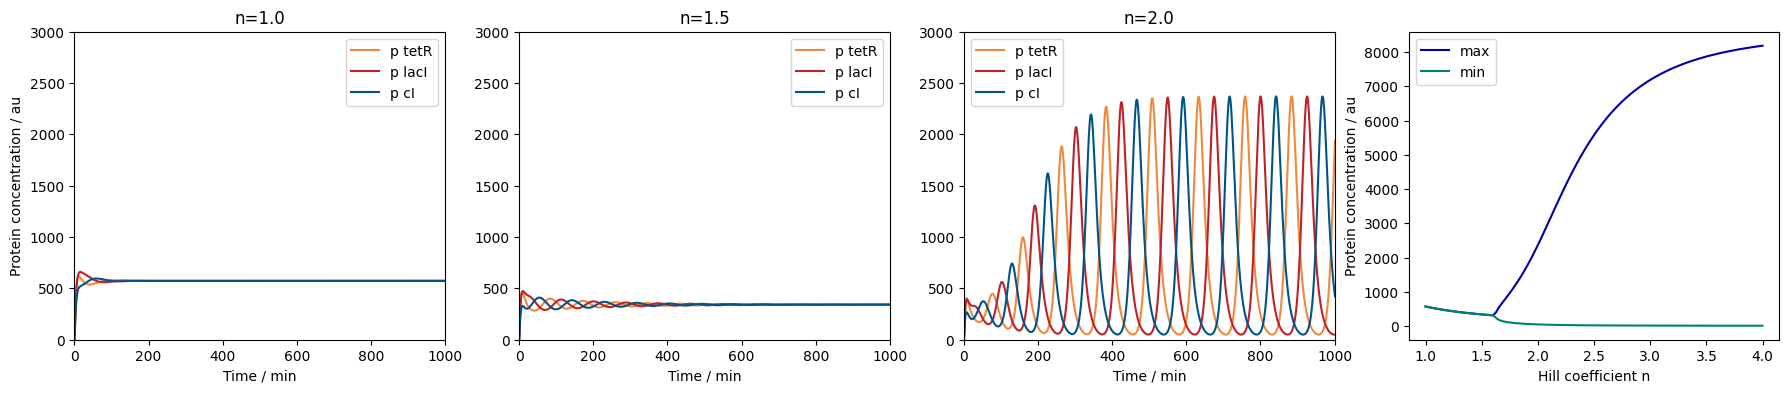

In [74]:
fig = plt.figure(figsize=(22,4))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


ax1.set_ylabel('Protein concentration / au')
ax1.set_xlabel('Time / min')
ax1.set_ylim(0,3000)
ax1.set_xlim(0,1000)
ax1.set_title('n=1.0')

ax2.set_xlabel('Time / min')
ax2.set_ylim(0,3000)
ax2.set_xlim(0,1000)
ax2.set_title('n=1.5')

ax3.set_xlabel('Time / min')
ax3.set_ylim(0,3000)
ax3.set_xlim(0,1000)
ax3.set_title('n=2.0')

for i in range(len(n_vals)):
    if n_vals[i] == 1:
        s_obs = s_runs[i]
        p_tetR_obs = s_obs[:,3]
        p_lacI_obs = s_obs[:,4]
        p_cI_obs =   s_obs[:,5]

        ax1.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
        ax1.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
        ax1.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)
    
    if n_vals[i] == 1.5:
        s_obs = s_runs[i]
        p_tetR_obs = s_obs[:,3]
        p_lacI_obs = s_obs[:,4]
        p_cI_obs =   s_obs[:,5]

        ax2.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
        ax2.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
        ax2.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)

    if n_vals[i] == 2:
        s_obs = s_runs[i]
        p_tetR_obs = s_obs[:,3]
        p_lacI_obs = s_obs[:,4]
        p_cI_obs =   s_obs[:,5]

        ax3.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
        ax3.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
        ax3.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')

ax4.plot(n_vals, p_tetR_max_vals,label='max',color=colors[1])
ax4.plot(n_vals, p_tetR_min_vals, label='min',color=colors[3])
ax4.set_xlabel('Hill coefficient n')
ax4.set_ylabel('Protein concentration / au')
ax4.legend(loc='best')

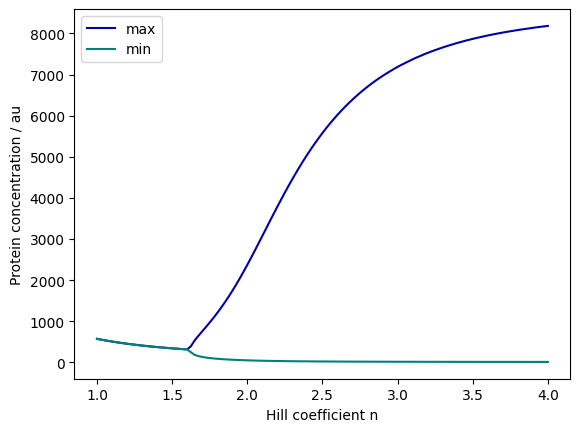

In [75]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.plot(n_vals, p_tetR_max_vals,label='max',color=colors[1])
ax1.plot(n_vals, p_tetR_min_vals, label='min',color=colors[3])
ax1.set_xlabel('Hill coefficient n')
ax1.set_ylabel('Protein concentration / au')
ax1.legend(loc='best')

In [76]:
for i in range(len(n_vals)):
    print (f'n: {n_vals[i]}, min: {p_tetR_min_vals[i]}, max: {p_tetR_max_vals[i]}')

n: 1.0, min: 573.2354447804502, max: 573.2354447804503
n: 1.025, min: 555.436882946611, max: 555.436882946611
n: 1.05, min: 538.5747484251684, max: 538.5747484251684
n: 1.075, min: 522.5855581227346, max: 522.5855581227346
n: 1.1, min: 507.41092704069587, max: 507.41092704069587
n: 1.125, min: 492.99710771323976, max: 492.9971077132398
n: 1.15, min: 479.29457454773024, max: 479.29457454773024
n: 1.175, min: 466.2576485507556, max: 466.2576485507556
n: 1.2, min: 453.84415835941877, max: 453.84415835941877
n: 1.225, min: 442.0151339005454, max: 442.0151339005454
n: 1.25, min: 430.7345293700605, max: 430.7345293700605
n: 1.275, min: 419.96897256153744, max: 419.9689725615375
n: 1.3, min: 409.68753787833936, max: 409.68753787833936
n: 1.325, min: 399.86154063966194, max: 399.861540639662
n: 1.35, min: 390.46431374757714, max: 390.46438754059994
n: 1.375, min: 381.4712223393903, max: 381.4712223393903
n: 1.4, min: 372.85909984714084, max: 372.85918434951844
n: 1.425, min: 364.60664393749255

In [77]:
# default parameter values 
# to match Repressilator model
km  = 30
km0 = 0.03
kdm = 0.346
kdp = 0.06931
K   = 40
n   = 2

#initial condtions
m_tetR0 = 5
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 0
p_lacI0 = 0
p_cI0   = 0

s0 = [ m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0 ]

# set time observations

t_max = 10000
t_obs = np.linspace(0,t_max,t_max+1)

s_runs = []

kp_factors = [0.1, 1, 10, 100]
kp = 6.931
kp_vals = []

# run simulation
for factor in kp_factors:
    kp = 6.931 * factor
    kp_vals.append (kp)
    params = [ km, km0, kdm, kp, kdp, K, n ]
    
    s_obs = odeint(sdot_repressilator,s0,t_obs,args=(params,))

    s_runs.append(s_obs)

print (kp_vals)


[0.6931, 6.931, 69.31, 693.1]


Text(0, 0.5, 'tetR protein concentration / au')

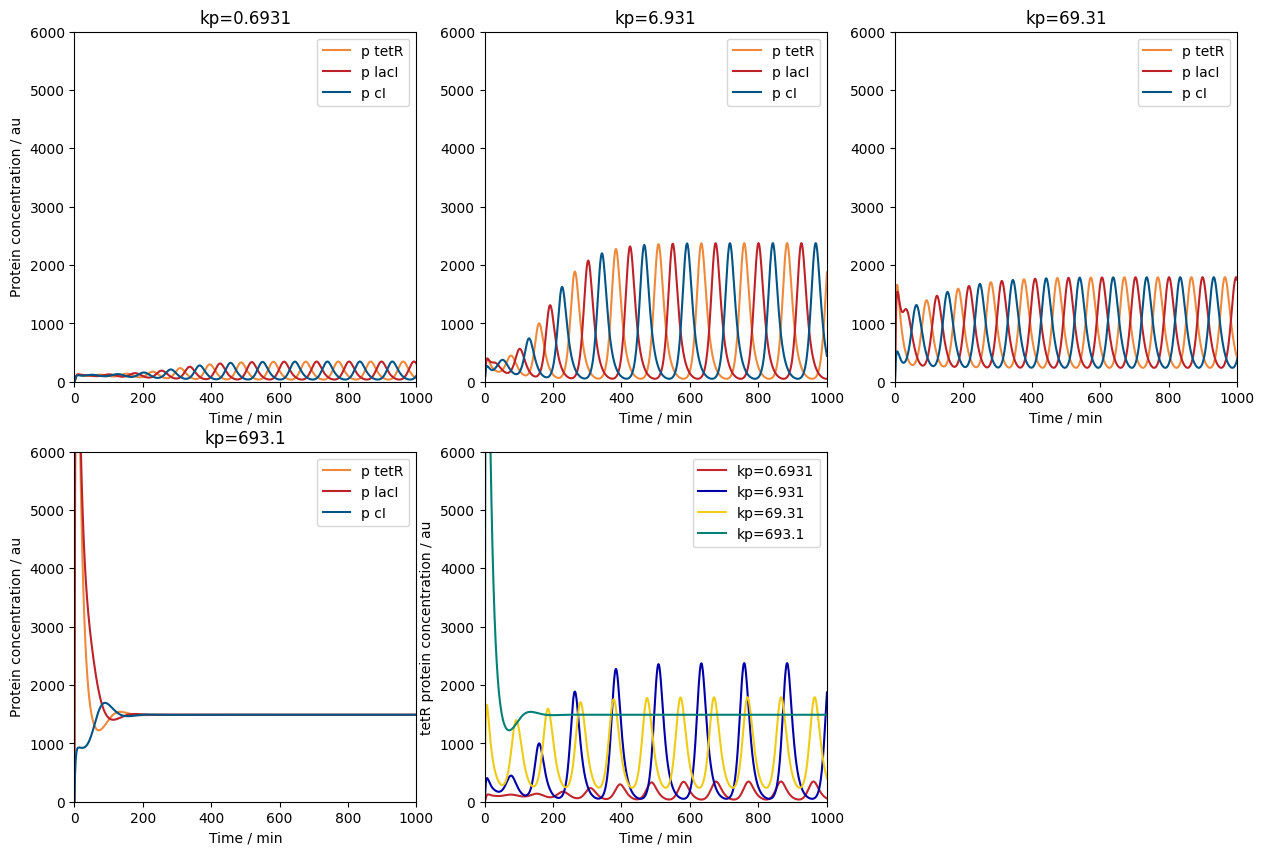

In [78]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)


figs = [ax1, ax2, ax3, ax4, ax5]

for i in range(len(kp_vals)):
    s_obs = s_runs[i]
    p_tetR_obs = s_obs[:,3]
    p_lacI_obs = s_obs[:,4]
    p_cI_obs =   s_obs[:,5]

    ax = figs[i]

    ax.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
    ax.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
    ax.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)

    ax.set_title(f'kp={kp_vals[i]}')

    ax5.plot(t_obs,p_tetR_obs, '-', label=f'kp={kp_vals[i]}',color=colors[i])

for ax in figs:
    ax.set_xlim(0,1000)
    ax.set_ylim(0,6000)
    ax.set_xlabel('Time / min')
    if figs.index(ax) in [0,3]: 
            ax.set_ylabel('Protein concentration / au')
    ax.legend(loc='best')

ax5.set_ylabel('tetR protein concentration / au')

    

In [79]:
# default parameter values 
# to match Repressilator model
kdm = 0.346
kdp = 0.06931
kp  = 6.931
K   = 40
n   = 2

#initial condtions
m_tetR0 = 5
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 0
p_lacI0 = 0
p_cI0   = 0

s0 = [ m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0 ]

# set time observations

t_max = 10000
t_obs = np.linspace(0,t_max,t_max+1)

s_runs = []

km0_factors = [0, 0.0001, 0.001, 0.01]
km0_vals = []

# run simulation
for factor in km0_factors:
    km  = 30
    km0  = km * factor
    km0_vals.append(km0)

    params = [ km, km0, kdm, kp, kdp, K, n ]
    
    s_obs = odeint(sdot_repressilator,s0,t_obs,args=(params,))

    s_runs.append(s_obs)



Text(0, 0.5, 'tetR protein concentration / au')

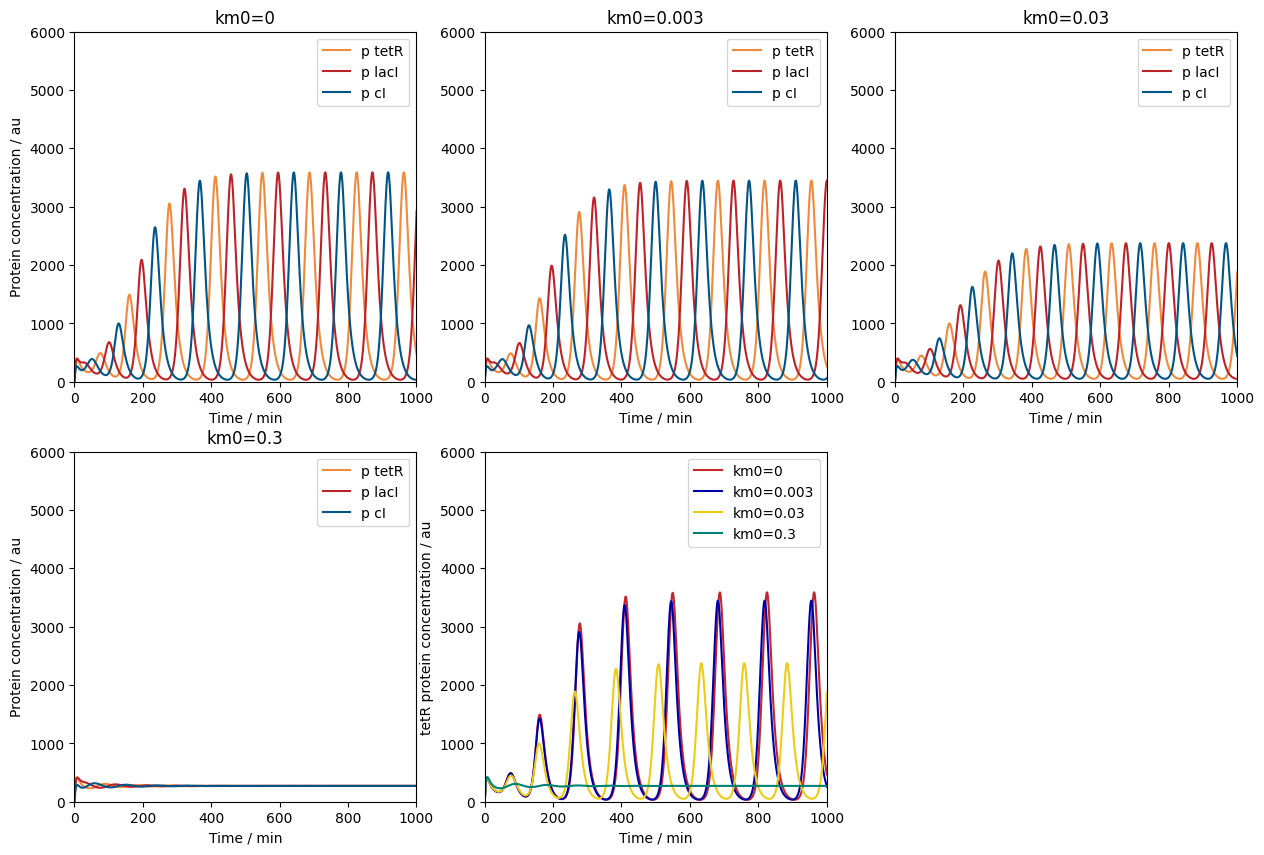

In [80]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)


figs = [ax1, ax2, ax3, ax4, ax5]

for i in range(len(km0_vals)):
    s_obs = s_runs[i]
    p_tetR_obs = s_obs[:,3]
    p_lacI_obs = s_obs[:,4]
    p_cI_obs =   s_obs[:,5]

    ax = figs[i]

    ax.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
    ax.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
    ax.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)

    ax.set_title(f'km0={km0_vals[i]}')

    ax5.plot(t_obs,p_tetR_obs, '-', label=f'km0={km0_vals[i]}',color=colors[i])

for ax in figs:
    ax.set_xlim(0,1000)
    ax.set_ylim(0,6000)
    ax.set_xlabel('Time / min')
    if figs.index(ax) in [0,3]: 
            ax.set_ylabel('Protein concentration / au')
    ax.legend(loc='best')

ax5.set_ylabel('tetR protein concentration / au')

    

Task 4

In [81]:
def sdot_repressilator_GFP(s,t,params):  
    
    km, km0, kdm, kp, kdp, K, n, kdp_GFP = params 
    m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI, m_GFP, p_GFP = s
        
    rate_m_tetR_prod = km * K**n/(K**n + p_lacI**n) + km0
    rate_m_lacI_prod = km * K**n/(K**n + p_cI**n) + km0
    rate_m_cI_prod   = km * K**n/(K**n + p_tetR**n) + km0
    rate_m_GFP_prod   = km * K**n/(K**n + p_tetR**n) + km0
    
    rate_p_tetR_prod = kp * m_tetR
    rate_p_lacI_prod = kp * m_lacI
    rate_p_cI_prod   = kp * m_cI
    rate_p_GFP_prod   = kp * m_GFP
    
    rate_m_tetR_loss = kdm * m_tetR
    rate_m_lacI_loss = kdm * m_lacI
    rate_m_cI_loss   = kdm * m_cI
    rate_m_GFP_loss   = kdm * m_GFP
    
    rate_p_tetR_loss = kdp * p_tetR
    rate_p_lacI_loss = kdp * p_lacI
    rate_p_cI_loss   = kdp * p_cI
    rate_p_GFP_loss   = kdp_GFP * p_GFP
    
    dm_tetR = rate_m_tetR_prod - rate_m_tetR_loss
    dm_lacI = rate_m_lacI_prod - rate_m_lacI_loss
    dm_cI   = rate_m_cI_prod - rate_m_cI_loss
    
    dp_tetR = rate_p_tetR_prod - rate_p_tetR_loss
    dp_lacI = rate_p_lacI_prod - rate_p_lacI_loss
    dp_cI   = rate_p_cI_prod - rate_p_cI_loss

    dm_GFP = rate_m_GFP_prod - rate_m_GFP_loss
    dp_GFP = rate_p_GFP_prod - rate_p_GFP_loss
    
    ds = [dm_tetR, dm_lacI, dm_cI, dp_tetR, dp_lacI, dp_cI, dm_GFP, dp_GFP]
    
    return ds  

In [82]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
kdp_GFP = 0.01155
K = 40
n = 2

params = [ km, km0, kdm, kp, kdp, K, n, kdp_GFP ]


#initial condtions
m_tetR0 = 5
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 0
p_lacI0 = 0
p_cI0   = 0

m_GFP0  = 0 
p_GFP0  = 0 

s0 = [ m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0, m_GFP0, p_GFP0 ]


# set time observations

t_max = 1000
t_obs = np.linspace(0,t_max,t_max+1) 

In [83]:
# run simulation

s_obs = odeint(sdot_repressilator_GFP,s0,t_obs,args=(params,))  

m_tetR_obs = s_obs[:,0]
m_lacI_obs = s_obs[:,1]
m_cI_obs =   s_obs[:,2]
p_tetR_obs = s_obs[:,3]
p_lacI_obs = s_obs[:,4]
p_cI_obs =   s_obs[:,5]

m_GFP_obs =  s_obs[:,6]
p_GFP_obs =  s_obs[:,7]



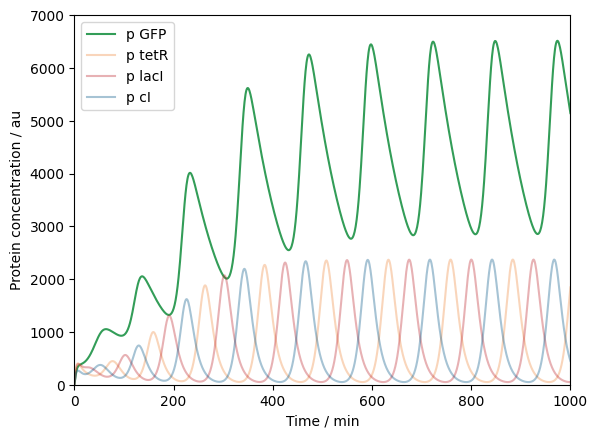

In [84]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylabel('Protein concentration / au')
ax.set_xlabel('Time / min')
ax.set_ylim(0,7000)
ax.set_xlim(0,1000)
ax.plot(t_obs, p_GFP_obs, '-', label='p GFP',color=GFP_col)
ax.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col,alpha=0.35)
ax.plot(t_obs, p_lacI_obs, '-', label='p lacI',color=lacI_col,alpha=0.35)
ax.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col,alpha=0.35)

ax.legend(loc='best')

Task 5

In [85]:
def sdot_repressilator(s,t,params):  
    
    km, km0, kdm, kp, kdp, K, n, X = params 
    m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI = s
        
    rate_m_tetR_prod = km * K**n/(K**n + (X*p_lacI)**n) + km0
    rate_m_lacI_prod = km * K**n/(K**n + p_cI**n) + km0
    rate_m_cI_prod   = km * K**n/(K**n + p_tetR**n) + km0
    
    rate_p_tetR_prod = kp * m_tetR
    rate_p_lacI_prod = kp * m_lacI
    rate_p_cI_prod   = kp * m_cI
    
    rate_m_tetR_loss = kdm * m_tetR
    rate_m_lacI_loss = kdm * m_lacI
    rate_m_cI_loss   = kdm * m_cI
    
    rate_p_tetR_loss = kdp * p_tetR
    rate_p_lacI_loss = kdp * p_lacI
    rate_p_cI_loss   = kdp * p_cI
    
    dm_tetR = rate_m_tetR_prod - rate_m_tetR_loss
    dm_lacI = rate_m_lacI_prod - rate_m_lacI_loss
    dm_cI   = rate_m_cI_prod - rate_m_cI_loss
    
    dp_tetR = rate_p_tetR_prod - rate_p_tetR_loss
    dp_lacI = rate_p_lacI_prod - rate_p_lacI_loss
    dp_cI   = rate_p_cI_prod - rate_p_cI_loss
    
    ds = [dm_tetR, dm_lacI, dm_cI, dp_tetR, dp_lacI, dp_cI]
    
    return ds  

In [86]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40
n = 2
# X = 0.5


#intitial condtions
m_tetR0 = 5
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 0
p_lacI0 = 0
p_cI0   = 0

s0 = [ m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0 ]


# set time observations

t_max = 1000
t_obs = np.linspace(0,t_max,t_max+1)

s_runs = []
X_vals = [0,0.5,1]

for X in X_vals:
    params = [ km, km0, kdm, kp, kdp, K, n, X ]

    s_obs = odeint(sdot_repressilator,s0,t_obs,args=(params,))
    
    s_runs.append(s_obs)

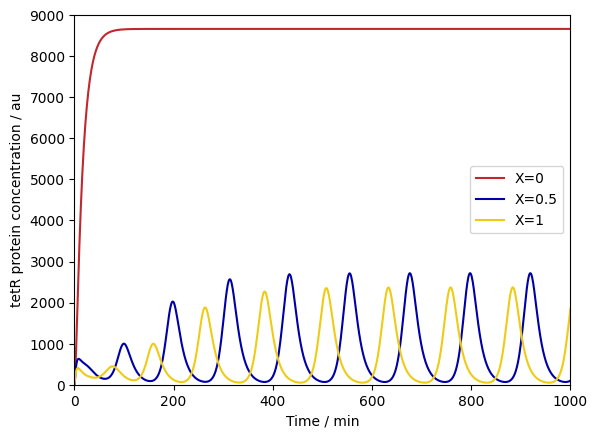

In [87]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylabel('tetR protein concentration / au')
ax.set_xlabel('Time / min')
ax.set_ylim(0,9000)
ax.set_xlim(0,1000)

for i in range(len(X_vals)):
    s_obs = s_runs[i]
    p_tetR_obs = s_obs[:,3]
    ax.plot(t_obs, p_tetR_obs, '-', label=f'X={X_vals[i]}',color=colors[i])

ax.legend(loc='best')

In [88]:
def sdot_repressilator(s,t,params):  
    
    km, km0, kdm, kp, kdp, K, n, Y = params 
    m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI = s
        
    rate_m_tetR_prod = km * K**n/(K**n + (p_lacI)**n) + km0
    rate_m_lacI_prod = km * K**n/(K**n + p_cI**n) + km0
    rate_m_cI_prod   = km * K**n/(K**n + p_tetR**n) + km0
    
    rate_p_tetR_prod = kp * m_tetR
    rate_p_lacI_prod = kp * m_lacI
    rate_p_cI_prod   = kp * m_cI
    
    rate_m_tetR_loss = kdm * m_tetR
    rate_m_lacI_loss = kdm * m_lacI
    rate_m_cI_loss   = kdm * m_cI
    
    rate_p_tetR_loss = Y * kdp * p_tetR
    rate_p_lacI_loss = Y * kdp * p_lacI
    rate_p_cI_loss   = Y * kdp * p_cI
    
    dm_tetR = rate_m_tetR_prod - rate_m_tetR_loss
    dm_lacI = rate_m_lacI_prod - rate_m_lacI_loss
    dm_cI   = rate_m_cI_prod - rate_m_cI_loss
    
    dp_tetR = rate_p_tetR_prod - rate_p_tetR_loss
    dp_lacI = rate_p_lacI_prod - rate_p_lacI_loss
    dp_cI   = rate_p_cI_prod - rate_p_cI_loss
    
    ds = [dm_tetR, dm_lacI, dm_cI, dp_tetR, dp_lacI, dp_cI]
    
    return ds  

In [89]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40
n = 2
# Y = 0.167


#intitial condtions
m_tetR0 = 5
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 0
p_lacI0 = 0
p_cI0   = 0

s0 = [ m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0 ]


# set time observations

t_max = 10000
t_obs = np.linspace(0,t_max,t_max+1)

Y_vals = [0, 0.167, 5]

s_runs = []
for Y in Y_vals:
    params = [ km, km0, kdm, kp, kdp, K, n, Y ]

    s_obs = odeint(sdot_repressilator,s0,t_obs,args=(params,))
    
    s_runs.append(s_obs)
    


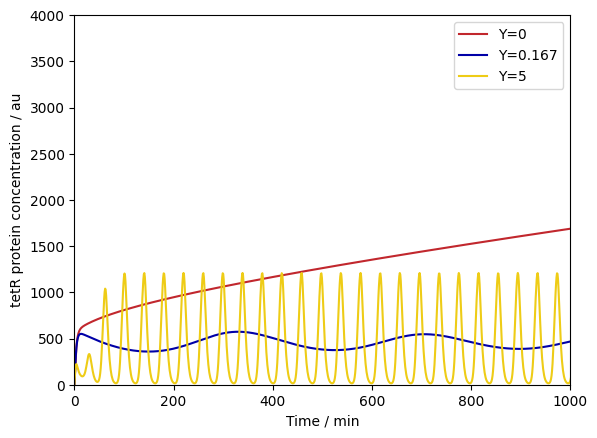

In [90]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylabel('tetR protein concentration / au')
ax.set_xlabel('Time / min')
ax.set_ylim(0,4000)
ax.set_xlim(0,1000)

for i in range(len(Y_vals)):
    s_obs = s_runs[i]
    p_tetR_obs = s_obs[:,3]
    ax.plot(t_obs, p_tetR_obs, '-', label=f'Y={Y_vals[i]}',color=colors[i])

ax.legend(loc='best')

Task 6

In [91]:
# TEMPLATE TO RUN GILLESPIE SIMULATION OF MODEL

###################
# Helper functions (Do not change!)

def find_index_from_time(t_obs,time,start_index=0):  
    # loop through t_obs array from i=0  
    # stopping when t_obs[i+1] is greater than time  
    # so that t_obs[i] < time < t_obs[i+1]  
    # return i 
    i=start_index
    while i+1<len(t_obs):  
        if t_obs[i+1]>time:
            break
        i=i+1
    # i now stores index corresponding to system at time requested  
    return i 
      
def resample_observations(t_obs_in, s_obs_in, t_obs_out):
    s_obs_out=[] 
    pos=0 
    for time in t_obs_out:  
        i=find_index_from_time(t_obs_in,time, start_index=pos)
        si = s_obs_in[i]  
        s_obs_out.append(si) 
        pos = i
    return s_obs_out


def gen_next_event_time(rate):
    t=random.expovariate(rate)
    return t


def random_choice_from_pdf(pdf):
    cdf=[]
    cumulative_p=0
    for p in pdf:
        cumulative_p+=p
        cdf.append(cumulative_p)
    rand=random.random()

    for i in range(len(cdf)):
        if rand<cdf[i]:
            return i
    # last cdf should be 1.0 so the following should never happen!
    print("Error generating choice, check PDF")
    return None

In [92]:
def gillespie_repressilator(s0,t_obs_out,params):

    #--0--# Unpack parameters and species variables

    km, km0, kdm, kp, kdp, K, n = params 
    m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI = s0

    #--0--#

    # create arrays for output
    s_obs=[]
    t_obs=[]

    # read in start time and end time
    t_init=t_obs_out[0]
    t_final=t_obs_out[-1]

    t=t_init
    t_obs.append(t)
    s_obs.append(s0)

    while t < t_final:

        #--1--# Write labels for each event type here.

        types=["m_tetR_prod",
               "m_lacI_prod",
               "m_cI_prod",
               "m_tetR_loss",
               "m_lacI_loss",
               "m_cI_loss",
               "p_tetR_prod",
               "p_lacI_prod",
               "p_cI_prod",
               "p_tetR_loss",
               "p_lacI_loss",
               "p_cI_loss",
                ]

        #--1--#


        #--2--# Write rate expressions for each of the events

        # COPY YOUR RATE EQUATIONS FROM 
        # THE ODE REPRESSILATOR MODEL HERE

        rate_m_tetR_prod = km * K**n/(K**n + p_lacI**n) + km0
        rate_m_lacI_prod = km * K**n/(K**n + p_cI**n) + km0
        rate_m_cI_prod   = km * K**n/(K**n + p_tetR**n) + km0
        
        rate_p_tetR_prod = kp * m_tetR
        rate_p_lacI_prod = kp * m_lacI
        rate_p_cI_prod   = kp * m_cI
        
        rate_m_tetR_loss = kdm * m_tetR
        rate_m_lacI_loss = kdm * m_lacI
        rate_m_cI_loss   = kdm * m_cI
        
        rate_p_tetR_loss = kdp * p_tetR
        rate_p_lacI_loss = kdp * p_lacI
        rate_p_cI_loss   = kdp * p_cI
        
        #--2--#



        #--3--# Store the rates into a list preserving the order of step 1.

        rates=[ rate_m_tetR_prod,
                rate_m_lacI_prod,
                rate_m_cI_prod,
                rate_m_tetR_loss,
                rate_m_lacI_loss,
                rate_m_cI_loss,
                rate_p_tetR_prod,
                rate_p_lacI_prod,
                rate_p_cI_prod,
                rate_p_tetR_loss,
                rate_p_lacI_loss,
                rate_p_cI_loss    ]

        #--3--#


        #-- Do not edit below --#

        ## CARRY OUT GILLESPIE ALGORITHM TO STEP FORWARD TO NEXT EVENT
        ## AND UPDATE SYSTEM STATE ACCORDING TO EVENT TYPE

        # calc total reaction rate
        rate_all_events=sum(rates)

        # if rate of events is zero break from loop
        # e.g. when all reactants used up
        if rate_all_events==0:
            break

        # generate the time until the next event
        # in accordance with rate_all_events
        next_event=gen_next_event_time(rate_all_events)

        # calc PDF for event type
        # in accordance with relative rates
        pdf=[]
        for event_rate in rates:
            p_event = event_rate/sum(rates)
            pdf.append(p_event)

        rand_i =  random_choice_from_pdf(pdf)
        event_type=types[rand_i]

        # increment time and number of molecules
        # according to event type
        t=t+next_event

        #-----------------------------------#



        ## ALGORITHM HAS INCREMENTED TIME AND SELECTED NEXT EVENT
        ## WE NOW NEED TO UPDATE OUR SYSTEM ACCORDING TO THE EVENT
        ## TYPE STORED IN VARIABLE event_type

        #--4--# Complete the if-elif-else commands to update the system
              # according to event type

        # complete the if-elif section below. The first one is 
        # provided as an example...
        
        if event_type=="m_tetR_prod":
            m_tetR = m_tetR + 1
        elif event_type=="m_lacI_prod":
            m_lacI += 1
        elif event_type=="m_cI_prod":
            m_cI += 1
        elif event_type=="m_tetR_loss":
            m_tetR -= 1
        elif event_type=="m_lacI_loss":
            m_lacI -= 1
        elif event_type=="m_cI_loss":
            m_cI -= 1
        elif event_type=="p_tetR_prod":
            p_tetR += 1
        elif event_type=="p_lacI_prod":
            p_lacI += 1
        elif event_type=="p_cI_prod":
            p_cI += 1
        elif event_type=="p_tetR_loss":
            p_tetR -= 1
        elif event_type=="p_lacI_loss":
            p_lacI -= 1
        elif event_type=="p_cI_loss":
            p_cI -= 1 
        else:
            print("error unknown event type!!")

        #--4--#

        # store observation
        s=[m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI]

        t_obs.append(t)
        s_obs.append(s)

        # loops until time t exceeds t_final

    # loop has ended

    # before we return the results we must
    # resample the output to provide observations in accordance
    # with the t_obs passed to the function
    s_obs_out=resample_observations(t_obs,s_obs,t_obs_out)
    return np.array(s_obs_out)


In [93]:
# DEFINE INITIAL CONDITIONS AND PARAMETERS

# set random seed so that notebook results are reproducible
random.seed(1000)

# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40
n = 2
# km = 0.5*60
# km0 = km*1e-4

params = [ km, km0, kdm, kp, kdp, K, n ]


#intitial condtions
m_tetR0 = 5
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 0
p_lacI0 = 0
p_cI0   = 0

s0 = [ m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0 ]

# set time observations
t_max=1000
t_obs=np.linspace(0,t_max,t_max*5+1) # 5 observations a minute

In [94]:
# run simulation
s_obs=gillespie_repressilator(s0,t_obs,params)

m_tetR_obs = s_obs[:,0]
m_lacI_obs = s_obs[:,1]
m_cI_obs   = s_obs[:,2]
p_tetR_obs = s_obs[:,3]
p_lacI_obs = s_obs[:,4]
p_cI_obs   = s_obs[:,5]

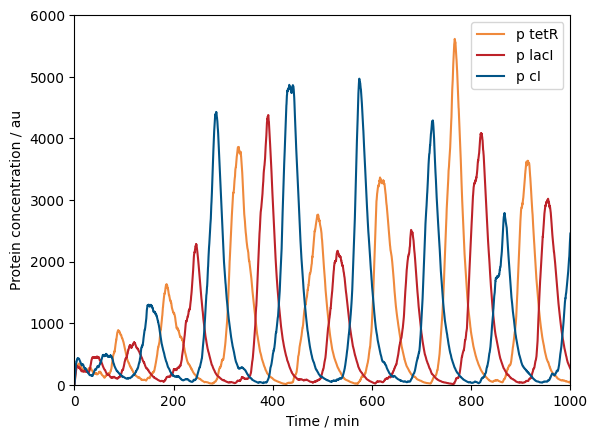

In [95]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylabel('Protein concentration / au')
ax.set_xlabel('Time / min')
ax.set_ylim(0,6000)
ax.set_xlim(0,1000)

ax.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
ax.plot(t_obs, p_lacI_obs, '-', label='p lacI',color=lacI_col)
ax.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)

ax.legend(loc='best')

In [96]:
s_runs = []

for i in range(20):
    s_obs=gillespie_repressilator(s0,t_obs,params)
    s_runs.append(s_obs)
    print (f'run: {i}')

run: 0
run: 1
run: 2
run: 3
run: 4
run: 5
run: 6
run: 7
run: 8
run: 9
run: 10
run: 11
run: 12
run: 13
run: 14
run: 15
run: 16
run: 17
run: 18
run: 19


In [97]:
p_tetR_runs = []
p_lacI_runs = []
p_cI_runs = []

for s_obs in s_runs:
    p_tetR_obs = s_obs[:,3]
    p_lacI_obs = s_obs[:,4]
    p_cI_obs   = s_obs[:,5]

    p_tetR_runs.append(p_tetR_obs)
    p_lacI_runs.append(p_lacI_obs)
    p_cI_runs.append(p_cI_obs)

(0.0, 1000.0)

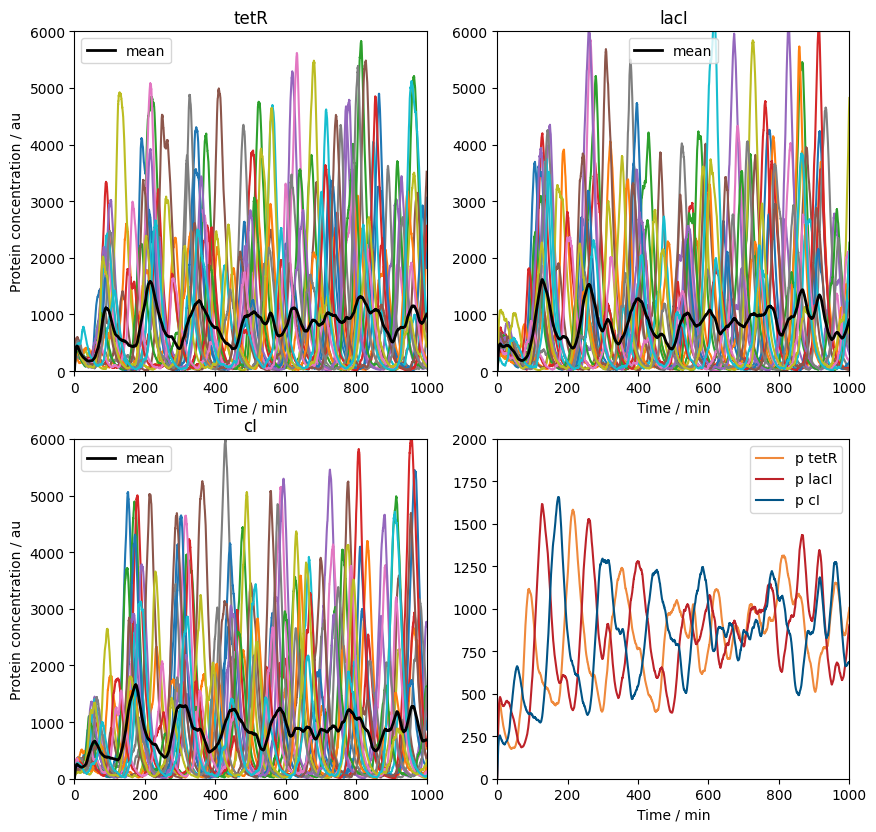

In [98]:
fig = plt.figure(figsize=(10,15))
ax1 = fig.add_subplot(3,2,1)
ax1.set_ylabel('Protein concentration / au')
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(324)
ax3.set_ylabel('Protein concentration / au')
ax1.set_xlabel('Time / min')
ax2.set_xlabel('Time / min')
ax3.set_xlabel('Time / min')
ax4.set_xlabel('Time / min')
ax1.set_title('tetR')
ax2.set_title('lacI')
ax3.set_title('cI')

for run in p_tetR_runs:
    ax1.plot(t_obs,run)
p_tetR_av=np.average(p_tetR_runs,axis=0)
ax1.plot(t_obs, p_tetR_av, '-', lw=2, color='black',label='mean')

for run in p_lacI_runs:
    ax2.plot(t_obs,run)
p_lacI_av=np.average(p_lacI_runs,axis=0)
ax2.plot(t_obs, p_lacI_av, '-', lw=2, color='black',label='mean')

for run in p_cI_runs:
    ax3.plot(t_obs,run)
p_cI_av=np.average(p_cI_runs,axis=0)
ax3.plot(t_obs, p_cI_av, '-', lw=2, color='black',label='mean')

ax4.plot(t_obs, p_tetR_av,label='p tetR',color=tetR_col)
ax4.plot(t_obs, p_lacI_av,label='p lacI',color=lacI_col)
ax4.plot(t_obs, p_cI_av,label='p cI',color=cI_col)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

ax1.set_ylim(0,6000)
ax1.set_xlim(0,1000)
ax2.set_ylim(0,6000)
ax2.set_xlim(0,1000)
ax3.set_ylim(0,6000)
ax3.set_xlim(0,1000)
ax4.set_ylim(0,2000)
ax4.set_xlim(0,1000)



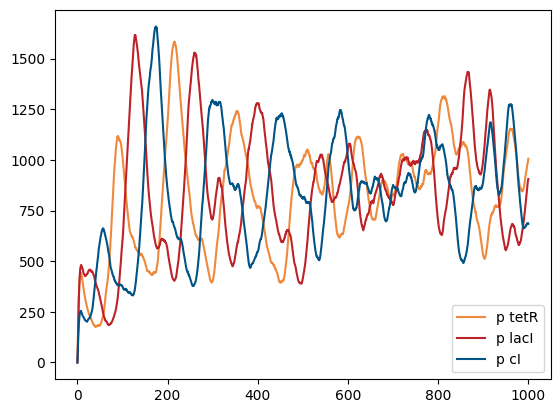

In [99]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.plot(t_obs, p_tetR_av,label='p tetR',color=tetR_col)
ax1.plot(t_obs, p_lacI_av,label='p lacI',color=lacI_col)
ax1.plot(t_obs, p_cI_av,label='p cI',color=cI_col)

ax1.legend()

In [100]:
# The peak_finder function that identifies the peaks in a sequence of observations
# it returns a list of identified maxima, with each item in the list
# storing peak time and peak height
# e.g. maxima =  peak_finder(t_obs, x_obs, 400)
# to examine first peak found with threshold set to 400
# peak_time   = maxima[0][0]
# peak_height = maxima[0][1]

def peak_finder(t_obs, x_obs, threshold=100):
    n_obs = len(t_obs)
    maxima = []
    minima = [] 
    # note minima are stored but not returned as we 
    # are only interested in maxima for this analysis
    
    # this stores the current seen maximum values
    stored_max_x = x_obs[0]
    stored_max_t = t_obs[0]
    
    # set search_dir to +1 to search for next maximum
    # set search_dir to -1 to search for next minimum

    search_dir = 1
    
    # initialise search direction (i.e. looking for max or min?)
    for i in range(n_obs):
        if x_obs[i]>x_obs[0]+threshold:
            # x initially increases, start by looking for max
            search_dir = 1
            break
        if x_obs[i]<x_obs[0]-threshold:
            # x initially decreases, start by looking for min
            search_dir = -1
            break
            
    # algorithm that runs the search
    for i in range(n_obs):
        if x_obs[i]*search_dir > stored_max_x*search_dir:
            stored_max_x = x_obs[i]
            stored_max_t = t_obs[i]
        if x_obs[i]*search_dir < stored_max_x*search_dir - threshold:
            if search_dir > 0:
                maxima.append((stored_max_t,stored_max_x))
            else:
                minima.append((stored_max_t,stored_max_x))
            stored_max_x = x_obs[i]
            stored_max_t = t_obs[i]
            search_dir = -1*search_dir
    return maxima

# Helper function that can save and load 
# a list of s_obs created by repeated 
# stoachastic simulation runs using
# numpy to save a compressed data file (.npz)

def save(myobj, filename):
    """Saves an object to disk
    """
    np.savez(filename, obj=myobj)


def load(filename):
    """Loads an object from disk
    """
    myobj = np.load(filename)['obj']
    return myobj




In [101]:
# load in runs
s_obs_list=load('repressilator_output.npz')

# reproduce the t_obs array used when simulating the runs
t_max=1000
t_obs=np.linspace(0,t_max,t_max*5+1) # 5 obs each minute

s_obs_1 = s_obs_list[0]
p_lacI_obs_1 = s_obs_1[:,4]

# check how many runs have been loaded
print("# runs in output:",len(s_obs_list))

# check number of observations in = loaded run
print("# observations in run",len(p_lacI_obs_1))

# runs in output: 100
# observations in run 5001


In [102]:
maxima1 = peak_finder(t_obs, p_lacI_obs_1, 200)

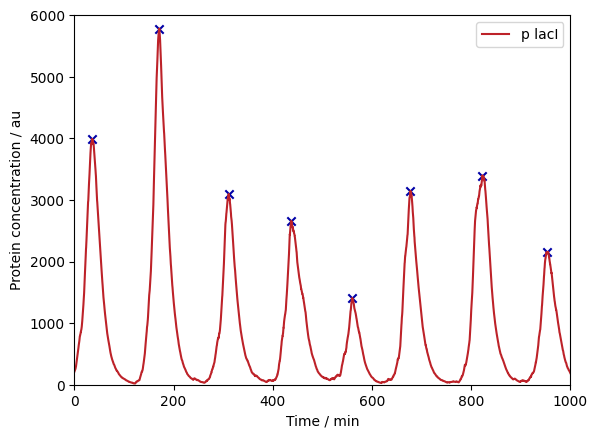

In [103]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.plot(t_obs, p_lacI_obs_1,color=lacI_col, label='p lacI')
ax1.set_ylim(0,6000)
ax1.set_xlim(0,1000)
ax1.set_ylabel('Protein concentration / au')
ax1.set_xlabel('Time / min')

for (x,y) in maxima1:
    ax1.scatter(x=x,y=y, marker='x',color=colors[1])

ax1.legend(loc='best')

In [104]:
heights = []
intervals = []

s_obs = s_obs_list[0]
p_lacI_obs = s_obs[:,4]

for i in range(len(s_obs_list)):
    s_obs = s_obs_list[i]
    p_lacI_obs = s_obs[:,4]

    maxima = peak_finder(t_obs, p_lacI_obs, 150)

    for i in range(len(maxima)):
        heights.append(maxima[i][1])

        if i != 0:
            interval = maxima[i][0] - maxima[i-1][0]

            intervals.append(interval)

values: 796
mean: 3211.928391959799
SD: 1339.9411039137935


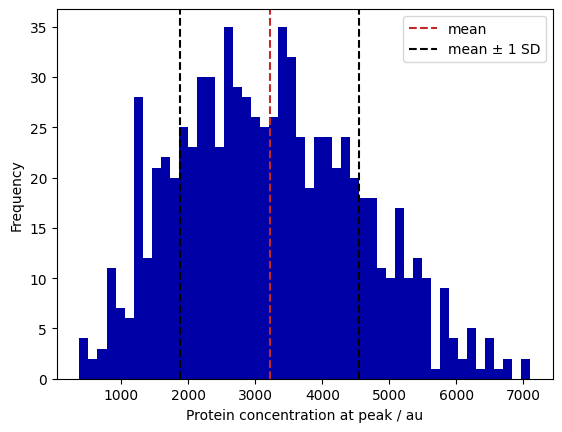

In [105]:
fig = plt.figure()
ax1 = fig.add_subplot()

mean = np.mean(heights)
std = np.std(heights)


ax1.hist(heights,bins=50, color=colors[1])

ax1.axvline(mean,color=colors[0], linestyle='dashed',label='mean')
ax1.axvline(mean+std,color='k', linestyle='dashed',label='mean ± 1 SD')
ax1.axvline(mean-std,color='k', linestyle='dashed')


ax1.set_ylabel('Frequency')
ax1.set_xlabel('Protein concentration at peak / au')
ax1.legend(loc='best')

print (f'values: {len(heights)}')
print (f'mean: {mean}')
print (f'SD: {std}')

values: 696
mean: 129.775
SD: 20.8786699231206


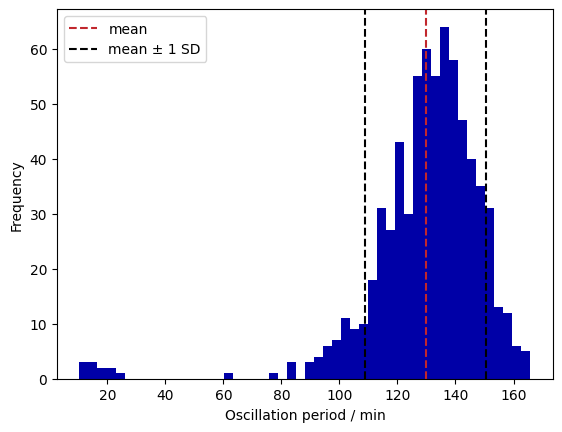

In [106]:
fig = plt.figure()
ax1 = fig.add_subplot()

mean = np.mean(intervals)
std = np.std(intervals)

ax1.hist(intervals,bins=50, color=colors[1])

ax1.axvline(mean,color=colors[0], linestyle='dashed',label='mean')
ax1.axvline(mean+std,color='k', linestyle='dashed',label='mean ± 1 SD')
ax1.axvline(mean-std,color='k', linestyle='dashed')

ax1.set_ylabel('Frequency')
ax1.set_xlabel('Oscillation period / min')

ax1.legend(loc='best')

print (f'values: {len(intervals)}')
print (f'mean: {mean}')
print (f'SD: {std}')

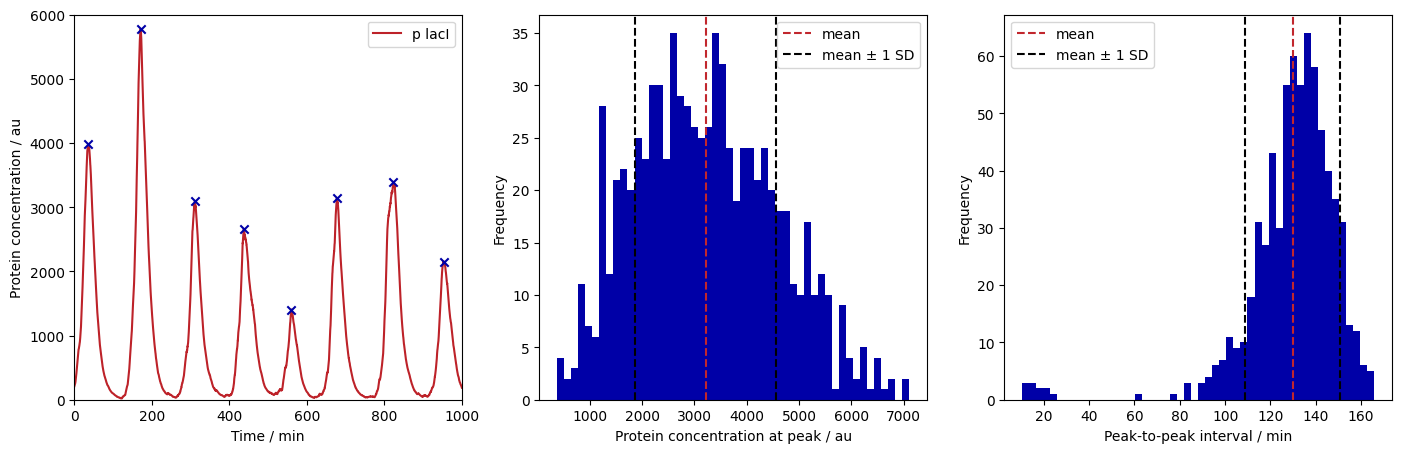

In [107]:
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)

ax1.plot(t_obs, p_lacI_obs_1,color=lacI_col, label='p lacI')
ax1.set_ylim(0,6000)
ax1.set_xlim(0,1000)
ax1.set_ylabel('Protein concentration / au')
ax1.set_xlabel('Time / min')

for (x,y) in maxima1:
    ax1.scatter(x=x,y=y, marker='x',color=colors[1],zorder=3)

ax1.legend(loc='best')



ax2 = fig.add_subplot(132)

mean = np.mean(heights)
std = np.std(heights)

ax2.hist(heights,bins=50, color=colors[1])

ax2.axvline(mean,color=colors[0], linestyle='dashed',label='mean')
ax2.axvline(mean+std,color='k', linestyle='dashed',label='mean ± 1 SD')
ax2.axvline(mean-std,color='k', linestyle='dashed')


ax2.set_ylabel('Frequency')
ax2.set_xlabel('Protein concentration at peak / au')
ax2.legend(loc='best')





ax3 = fig.add_subplot(133)

mean = np.mean(intervals)
std = np.std(intervals)

ax3.hist(intervals,bins=50, color=colors[1])

ax3.axvline(mean,color=colors[0], linestyle='dashed',label='mean')
ax3.axvline(mean+std,color='k', linestyle='dashed',label='mean ± 1 SD')
ax3.axvline(mean-std,color='k', linestyle='dashed')

ax3.set_ylabel('Frequency')
ax3.set_xlabel('Peak-to-peak interval / min')

ax3.legend(loc='best')

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.integrate import odeint  
import math
import random

lacI_col = '#bd2229'
cI_col = '#015486'
tetR_col = '#ef893c'
GFP_col = '#339d58'
colors = ['#c1272d', '#0000a7', '#eecc16', '#008176', '#b3b3b3']

In [ ]:
def sdot_repressilator(s,t,params):  
    
    km, km0, kdm, kp, kdp, K, n = params 
    m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI = s
        
    rate_m_tetR_prod = km * K**n/(K**n + p_lacI**n) + km0
    rate_m_lacI_prod = km * K**n/(K**n + p_cI**n) + km0
    rate_m_cI_prod   = km * K**n/(K**n + p_tetR**n) + km0
    
    rate_p_tetR_prod = kp * m_tetR
    rate_p_lacI_prod = kp * m_lacI
    rate_p_cI_prod   = kp * m_cI
    
    rate_m_tetR_loss = kdm * m_tetR
    rate_m_lacI_loss = kdm * m_lacI
    rate_m_cI_loss   = kdm * m_cI
    
    rate_p_tetR_loss = kdp * p_tetR
    rate_p_lacI_loss = kdp * p_lacI
    rate_p_cI_loss   = kdp * p_cI
    
    dm_tetR = rate_m_tetR_prod - rate_m_tetR_loss
    dm_lacI = rate_m_lacI_prod - rate_m_lacI_loss
    dm_cI   = rate_m_cI_prod - rate_m_cI_loss
    
    dp_tetR = rate_p_tetR_prod - rate_p_tetR_loss
    dp_lacI = rate_p_lacI_prod - rate_p_lacI_loss
    dp_cI   = rate_p_cI_prod - rate_p_cI_loss
    
    ds = [dm_tetR, dm_lacI, dm_cI, dp_tetR, dp_lacI, dp_cI]
    
    return ds  

In [ ]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40

#initial condtions
m_tetR0 = 5
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 0
p_lacI0 = 0
p_cI0   = 0

s0 = [ m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0 ]

# set time observations

t_max = 10000
t_obs = np.linspace(0,t_max,t_max+1)

s_runs = []

n_vals = np.linspace(1,4,121)
print (n_vals)
# run simulation
for n in n_vals:
    params = [ km, km0, kdm, kp, kdp, K, n ]
    s_obs = odeint(sdot_repressilator,s0,t_obs,args=(params,))

    s_runs.append(s_obs)


[1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175 1.2   1.225 1.25  1.275
 1.3   1.325 1.35  1.375 1.4   1.425 1.45  1.475 1.5   1.525 1.55  1.575
 1.6   1.625 1.65  1.675 1.7   1.725 1.75  1.775 1.8   1.825 1.85  1.875
 1.9   1.925 1.95  1.975 2.    2.025 2.05  2.075 2.1   2.125 2.15  2.175
 2.2   2.225 2.25  2.275 2.3   2.325 2.35  2.375 2.4   2.425 2.45  2.475
 2.5   2.525 2.55  2.575 2.6   2.625 2.65  2.675 2.7   2.725 2.75  2.775
 2.8   2.825 2.85  2.875 2.9   2.925 2.95  2.975 3.    3.025 3.05  3.075
 3.1   3.125 3.15  3.175 3.2   3.225 3.25  3.275 3.3   3.325 3.35  3.375
 3.4   3.425 3.45  3.475 3.5   3.525 3.55  3.575 3.6   3.625 3.65  3.675
 3.7   3.725 3.75  3.775 3.8   3.825 3.85  3.875 3.9   3.925 3.95  3.975
 4.   ]


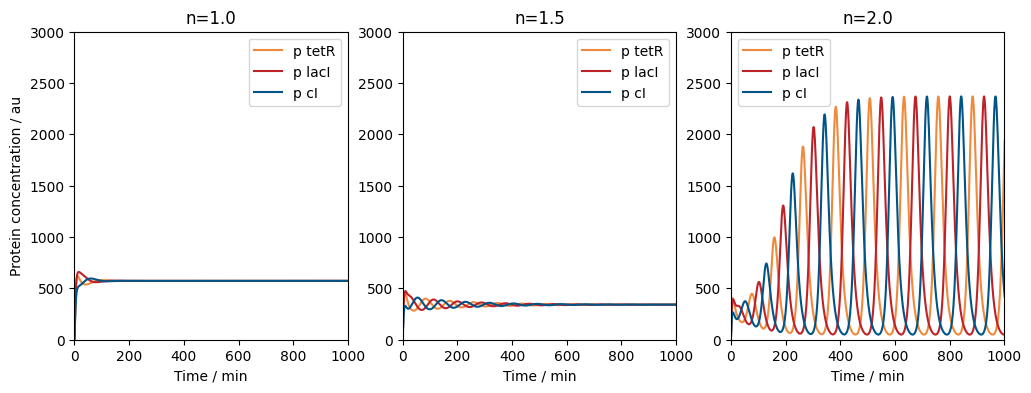

In [ ]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.set_ylabel('Protein concentration / au')
ax1.set_xlabel('Time / min')
ax1.set_ylim(0,3000)
ax1.set_xlim(0,1000)
ax1.set_title('n=1.0')

ax2.set_xlabel('Time / min')
ax2.set_ylim(0,3000)
ax2.set_xlim(0,1000)
ax2.set_title('n=1.5')

ax3.set_xlabel('Time / min')
ax3.set_ylim(0,3000)
ax3.set_xlim(0,1000)
ax3.set_title('n=2.0')

for i in range(len(n_vals)):
    if n_vals[i] == 1:
        s_obs = s_runs[i]
        p_tetR_obs = s_obs[:,3]
        p_lacI_obs = s_obs[:,4]
        p_cI_obs =   s_obs[:,5]

        ax1.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
        ax1.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
        ax1.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)
    
    if n_vals[i] == 1.5:
        s_obs = s_runs[i]
        p_tetR_obs = s_obs[:,3]
        p_lacI_obs = s_obs[:,4]
        p_cI_obs =   s_obs[:,5]

        ax2.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
        ax2.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
        ax2.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)

    if n_vals[i] == 2:
        s_obs = s_runs[i]
        p_tetR_obs = s_obs[:,3]
        p_lacI_obs = s_obs[:,4]
        p_cI_obs =   s_obs[:,5]

        ax3.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
        ax3.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
        ax3.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')

In [ ]:
p_tetR_max_vals = []
p_tetR_min_vals = []

for i in range(len(n_vals)):
    s_obs = s_runs[i]

    p_tetR_obs = s_obs[:,3]

    osc_max = np.max(p_tetR_obs[-500:])
    osc_min = np.min(p_tetR_obs[-500:])

    p_tetR_max_vals.append(osc_max)
    p_tetR_min_vals.append(osc_min)
    

In [ ]:
print (len(n_vals))
print (len(p_tetR_max_vals))
print (len(p_tetR_min_vals))

121
121
121


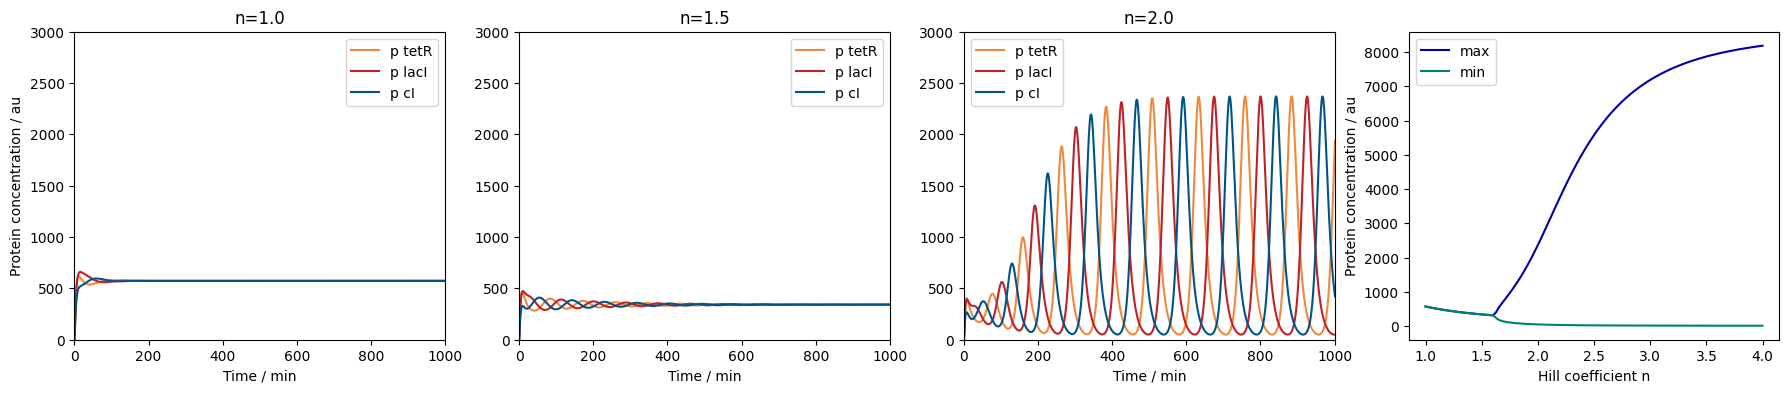

In [ ]:
fig = plt.figure(figsize=(22,4))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


ax1.set_ylabel('Protein concentration / au')
ax1.set_xlabel('Time / min')
ax1.set_ylim(0,3000)
ax1.set_xlim(0,1000)
ax1.set_title('n=1.0')

ax2.set_xlabel('Time / min')
ax2.set_ylim(0,3000)
ax2.set_xlim(0,1000)
ax2.set_title('n=1.5')

ax3.set_xlabel('Time / min')
ax3.set_ylim(0,3000)
ax3.set_xlim(0,1000)
ax3.set_title('n=2.0')

for i in range(len(n_vals)):
    if n_vals[i] == 1:
        s_obs = s_runs[i]
        p_tetR_obs = s_obs[:,3]
        p_lacI_obs = s_obs[:,4]
        p_cI_obs =   s_obs[:,5]

        ax1.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
        ax1.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
        ax1.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)
    
    if n_vals[i] == 1.5:
        s_obs = s_runs[i]
        p_tetR_obs = s_obs[:,3]
        p_lacI_obs = s_obs[:,4]
        p_cI_obs =   s_obs[:,5]

        ax2.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
        ax2.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
        ax2.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)

    if n_vals[i] == 2:
        s_obs = s_runs[i]
        p_tetR_obs = s_obs[:,3]
        p_lacI_obs = s_obs[:,4]
        p_cI_obs =   s_obs[:,5]

        ax3.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
        ax3.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
        ax3.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')

ax4.plot(n_vals, p_tetR_max_vals,label='max',color=colors[1])
ax4.plot(n_vals, p_tetR_min_vals, label='min',color=colors[3])
ax4.set_xlabel('Hill coefficient n')
ax4.set_ylabel('Protein concentration / au')
ax4.legend(loc='best')

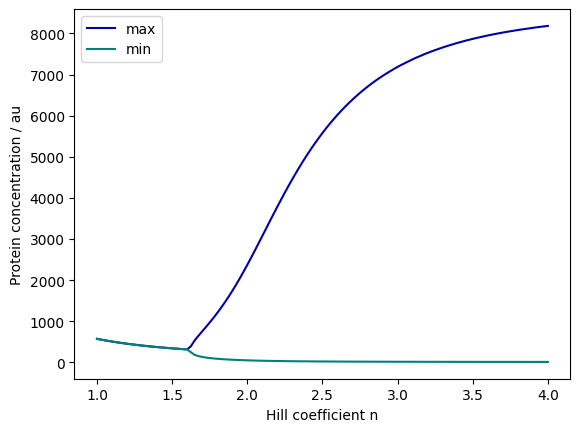

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.plot(n_vals, p_tetR_max_vals,label='max',color=colors[1])
ax1.plot(n_vals, p_tetR_min_vals, label='min',color=colors[3])
ax1.set_xlabel('Hill coefficient n')
ax1.set_ylabel('Protein concentration / au')
ax1.legend(loc='best')

In [ ]:
for i in range(len(n_vals)):
    print (f'n: {n_vals[i]}, min: {p_tetR_min_vals[i]}, max: {p_tetR_max_vals[i]}')

n: 1.0, min: 573.2354447804502, max: 573.2354447804503
n: 1.025, min: 555.436882946611, max: 555.436882946611
n: 1.05, min: 538.5747484251684, max: 538.5747484251684
n: 1.075, min: 522.5855581227346, max: 522.5855581227346
n: 1.1, min: 507.41092704069587, max: 507.41092704069587
n: 1.125, min: 492.99710771323976, max: 492.9971077132398
n: 1.15, min: 479.29457454773024, max: 479.29457454773024
n: 1.175, min: 466.2576485507556, max: 466.2576485507556
n: 1.2, min: 453.84415835941877, max: 453.84415835941877
n: 1.225, min: 442.0151339005454, max: 442.0151339005454
n: 1.25, min: 430.7345293700605, max: 430.7345293700605
n: 1.275, min: 419.96897256153744, max: 419.9689725615375
n: 1.3, min: 409.68753787833936, max: 409.68753787833936
n: 1.325, min: 399.86154063966194, max: 399.861540639662
n: 1.35, min: 390.46431374757714, max: 390.46438754059994
n: 1.375, min: 381.4712223393903, max: 381.4712223393903
n: 1.4, min: 372.85909984714084, max: 372.85918434951844
n: 1.425, min: 364.60664393749255

In [ ]:
# default parameter values 
# to match Repressilator model
km  = 30
km0 = 0.03
kdm = 0.346
kdp = 0.06931
K   = 40
n   = 2

#initial condtions
m_tetR0 = 5
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 0
p_lacI0 = 0
p_cI0   = 0

s0 = [ m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0 ]

# set time observations

t_max = 10000
t_obs = np.linspace(0,t_max,t_max+1)

s_runs = []

kp_factors = [0.1, 1, 10, 100]
kp = 6.931
kp_vals = []

# run simulation
for factor in kp_factors:
    kp = 6.931 * factor
    kp_vals.append (kp)
    params = [ km, km0, kdm, kp, kdp, K, n ]
    
    s_obs = odeint(sdot_repressilator,s0,t_obs,args=(params,))

    s_runs.append(s_obs)

print (kp_vals)


[0.6931, 6.931, 69.31, 693.1]


Text(0, 0.5, 'tetR protein concentration / au')

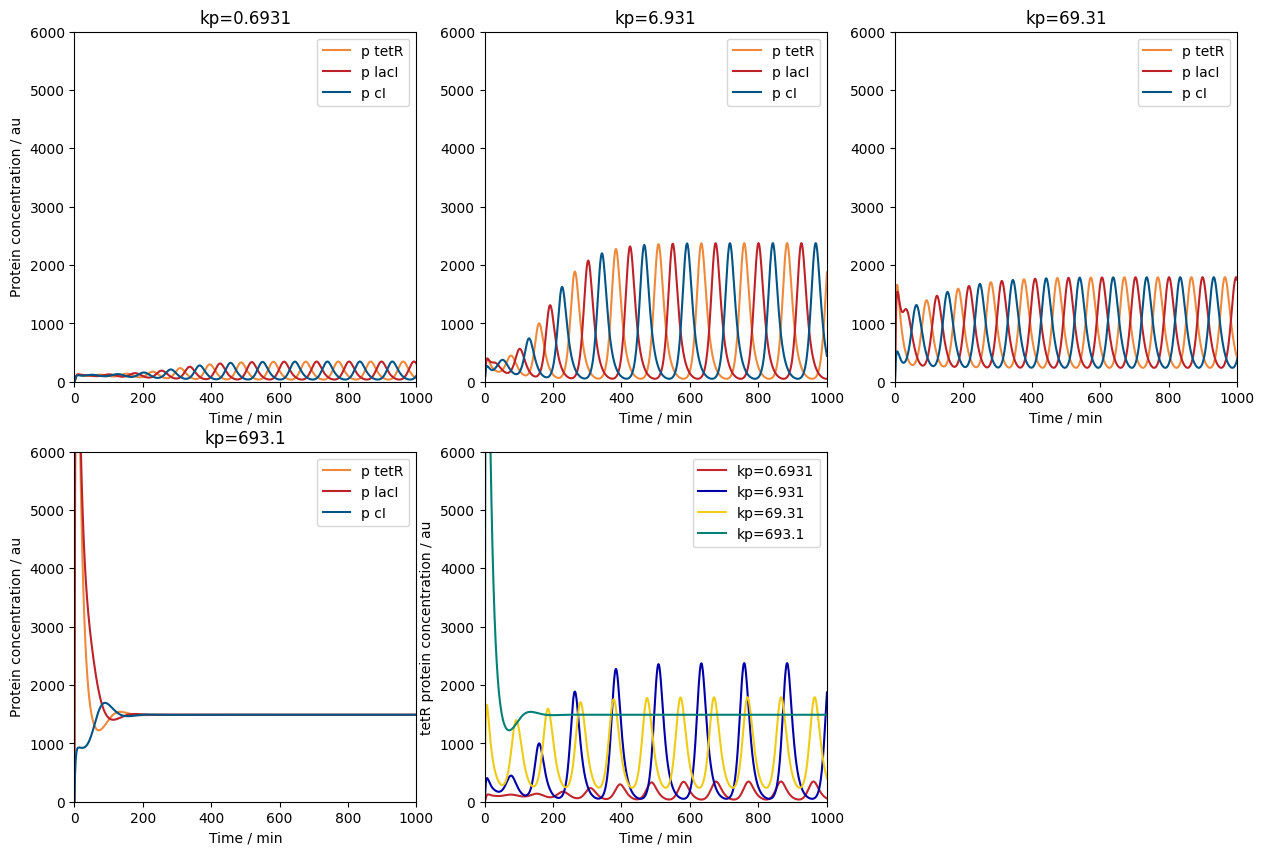

In [ ]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)


figs = [ax1, ax2, ax3, ax4, ax5]

for i in range(len(kp_vals)):
    s_obs = s_runs[i]
    p_tetR_obs = s_obs[:,3]
    p_lacI_obs = s_obs[:,4]
    p_cI_obs =   s_obs[:,5]

    ax = figs[i]

    ax.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
    ax.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
    ax.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)

    ax.set_title(f'kp={kp_vals[i]}')

    ax5.plot(t_obs,p_tetR_obs, '-', label=f'kp={kp_vals[i]}',color=colors[i])

for ax in figs:
    ax.set_xlim(0,1000)
    ax.set_ylim(0,6000)
    ax.set_xlabel('Time / min')
    if figs.index(ax) in [0,3]: 
            ax.set_ylabel('Protein concentration / au')
    ax.legend(loc='best')

ax5.set_ylabel('tetR protein concentration / au')

    

In [ ]:
# default parameter values 
# to match Repressilator model
kdm = 0.346
kdp = 0.06931
kp  = 6.931
K   = 40
n   = 2

#initial condtions
m_tetR0 = 5
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 0
p_lacI0 = 0
p_cI0   = 0

s0 = [ m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0 ]

# set time observations

t_max = 10000
t_obs = np.linspace(0,t_max,t_max+1)

s_runs = []

km0_factors = [0, 0.0001, 0.001, 0.01]
km0_vals = []

# run simulation
for factor in km0_factors:
    km  = 30
    km0  = km * factor
    km0_vals.append(km0)

    params = [ km, km0, kdm, kp, kdp, K, n ]
    
    s_obs = odeint(sdot_repressilator,s0,t_obs,args=(params,))

    s_runs.append(s_obs)



Text(0, 0.5, 'tetR protein concentration / au')

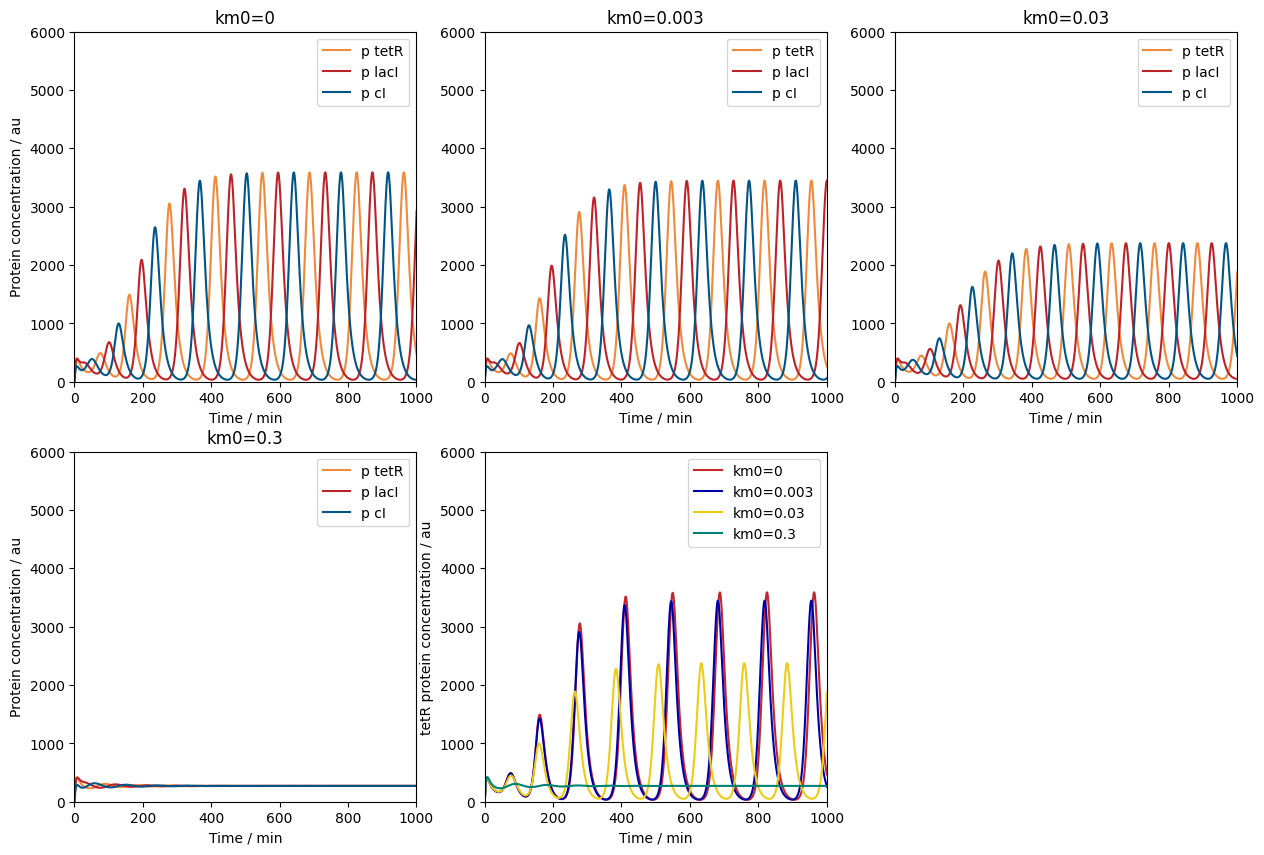

In [ ]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)


figs = [ax1, ax2, ax3, ax4, ax5]

for i in range(len(km0_vals)):
    s_obs = s_runs[i]
    p_tetR_obs = s_obs[:,3]
    p_lacI_obs = s_obs[:,4]
    p_cI_obs =   s_obs[:,5]

    ax = figs[i]

    ax.plot(t_obs, p_tetR_obs, '-', label='p tetR', color=tetR_col)
    ax.plot(t_obs, p_lacI_obs, '-', label='p lacI', color=lacI_col)
    ax.plot(t_obs, p_cI_obs, '-', label='p cI',color=cI_col)

    ax.set_title(f'km0={km0_vals[i]}')

    ax5.plot(t_obs,p_tetR_obs, '-', label=f'km0={km0_vals[i]}',color=colors[i])

for ax in figs:
    ax.set_xlim(0,1000)
    ax.set_ylim(0,6000)
    ax.set_xlabel('Time / min')
    if figs.index(ax) in [0,3]: 
            ax.set_ylabel('Protein concentration / au')
    ax.legend(loc='best')

ax5.set_ylabel('tetR protein concentration / au')

    